## Load datasets

In [1]:
import pandas as pd
data_path = 'datasets_'
# node_paths_dir = 'data_preprocessing/preprocessed_datasets/debug_datasets'

In [2]:
df = pd.read_csv('data_preprocessing/Bigvul/MSR.csv')
nan_counts = df.isna().sum()
print("Before dropping nan\n",nan_counts)
df = df.drop_duplicates()
df = df.dropna()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
nan_counts = df.isna().sum()
print("After dropping nan\n",nan_counts)
df

Before dropping nan
 Unnamed: 0        0
code              0
cwe_id            0
cve_id        12638
vul               0
dtype: int64
After dropping nan
 code      0
cwe_id    0
cve_id    0
vul       0
dtype: int64


,code,cwe_id,cve_id,vul
0,static PHP_FUNCTION(preg_match)\n{\n\tphp_do_p...,119,CVE-2015-8382,0
1,static PHP_FUNCTION(preg_match_all)\n{\n\tphp_...,119,CVE-2015-8382,0
2,static PHP_FUNCTION(preg_replace)\n{\n\tpreg_r...,119,CVE-2015-8382,0
3,static PHP_FUNCTION(preg_replace_callback)\n{\...,119,CVE-2015-8382,0
4,static PHP_FUNCTION(preg_filter)\n{\n\tpreg_re...,119,CVE-2015-8382,0
...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1


In [3]:
CVEfixes_df = pd.read_csv('data_preprocessing/CVEfixes/CVEfixes_new.csv')
nan_counts = CVEfixes_df.isna().sum()
print("Before dropping nan\n",nan_counts)
CVEfixes_df = CVEfixes_df.dropna()
nan_counts = CVEfixes_df.isna().sum()
print("After dropping nan\n",nan_counts)
CVEfixes_df = CVEfixes_df.drop_duplicates()
CVEfixes_df['vul'] = CVEfixes_df['vul'].astype(int)
CVEfixes_df['cwe_id'] = CVEfixes_df['cwe_id'].astype(int)
CVEfixes_df

Before dropping nan
 code      20
cwe_id    20
cve_id    20
vul       20
dtype: int64
After dropping nan
 code      0
cwe_id    0
cve_id    0
vul       0
dtype: int64


,code,cwe_id,cve_id,vul
0,expand_dynamic_string_token (struct link_map *...,252,CVE-1999-0199,1
1,"_dl_dst_substitute (struct link_map *l, const ...",252,CVE-1999-0199,1
2,"_dl_dst_count (const char *name, int is_path)\...",252,CVE-1999-0199,1
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1
4,init_syntax_once ()\n{\n register int c;\n ...,252,CVE-1999-0199,1
...,...,...,...,...
69204,const delimiter = `ghadelimiter_${uuidv4()...,0,CVE-2022-35954,0
69205,private boolean isFileWithinDirectory(\n ...,0,CVE-2022-36007,0
69206,func TestNegativePowerLevels(t *testing.T) {\n...,0,CVE-2022-36009,0
69207,func NewPowerLevelContentFromEvent(event *Even...,0,CVE-2022-36009,0


In [4]:
CVEfixes_df['vul'].nunique()

2

In [61]:
# ll = CVEfixes_df['code'].head(2).tolist()
# print(ll[0])

In [60]:
# print(ll[1])

## Analysis 
* CVE ID value counts
* CVE ID overlap between two datasets

In [7]:
CVEfixes_df['cve_id'].value_counts()

CVE-2016-10096    6773
CVE-2021-27341    2252
CVE-2021-27340    2252
CVE-2021-4097     2237
CVE-2022-1730     1886
                  ... 
CVE-2019-7175        1
CVE-2019-11470       1
CVE-2019-13136       1
CVE-2020-5260        1
CVE-2022-36752       1
Name: cve_id, Length: 5297, dtype: int64

In [8]:
df['cve_id'].value_counts()

CVE-2016-5219     1520
CVE-2017-5120     1064
CVE-2012-5148     1053
CVE-2012-2875     1029
CVE-2018-13006     931
                  ... 
CVE-2017-17853       1
CVE-2016-3747        1
CVE-2017-16531       1
CVE-2010-1797        1
CVE-2017-13187       1
Name: cve_id, Length: 2858, dtype: int64

In [9]:
list1 = CVEfixes_df['cve_id'].value_counts().index.tolist()

In [10]:
list2 = df['cve_id'].value_counts().index.tolist()

In [11]:
inter = set.intersection(set(list1), set(list2))
len(inter)

1391

In [12]:
code = df[df['cve_id']=='CVE-2017-12190'].tail(1)['code'].tolist()

In [13]:
# print(code[0])

In [14]:
code2 = CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].tail(1)['code'].tolist()
# print(code2[0])

In [15]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190']

,code,cwe_id,cve_id,vul
678,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1
31437,struct bio *bio_map_user_iov(struct request_qu...,0,CVE-2017-12190,0
31438,struct bio *bio_map_user_iov(struct request_qu...,0,CVE-2017-12190,0


In [16]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].duplicated(keep=False)

678      False
31437    False
31438    False
dtype: bool

In [17]:
CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190']

,code,cwe_id,cve_id,vul
678,struct bio *bio_map_user_iov(struct request_qu...,772,CVE-2017-12190,1
31437,struct bio *bio_map_user_iov(struct request_qu...,0,CVE-2017-12190,0
31438,struct bio *bio_map_user_iov(struct request_qu...,0,CVE-2017-12190,0


In [18]:
cc = CVEfixes_df[CVEfixes_df['cve_id']=='CVE-2017-12190'].code.tolist()
len(set(cc))

2

In [62]:
# print(cc[0])

In [63]:
# print(cc[1])

## Combine two datasets

In [21]:
# Combine two DataFrames and drop duplicates
combined_df = pd.concat([CVEfixes_df, df])
print(combined_df.shape)
combined_df = combined_df.drop_duplicates()
print(combined_df.shape)
# Display rows with NaN values
nan_rows = combined_df[combined_df.isna().any(axis=1)]
print(nan_rows)
combined_df = combined_df.dropna()
print(combined_df.shape)

(201265, 4)
(201265, 4)
Empty DataFrame
Columns: [code, cwe_id, cve_id, vul]
Index: []
(201265, 4)


In [22]:
combined_df.to_csv(f"{data_path}/combined_dataset.csv")

In [23]:
unique_values = combined_df.nunique()
unique_values

code      185198
cwe_id       171
cve_id      6764
vul            2
dtype: int64

In [65]:
unique_cwe_ids = combined_df['cwe_id'].unique().tolist()
unique_cwe_ids = sorted(unique_cwe_ids)
print(unique_cwe_ids)

[0, 20, 22, 23, 27, 59, 73, 74, 77, 78, 79, 80, 88, 89, 90, 91, 93, 94, 98, 113, 116, 119, 120, 121, 122, 125, 126, 129, 131, 134, 172, 178, 184, 185, 190, 191, 193, 200, 203, 208, 209, 212, 241, 252, 269, 273, 276, 277, 281, 284, 285, 287, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 352, 354, 358, 359, 362, 367, 369, 378, 379, 384, 400, 401, 404, 415, 416, 425, 426, 427, 428, 434, 436, 444, 457, 459, 470, 475, 476, 494, 502, 521, 522, 532, 538, 552, 565, 601, 610, 611, 613, 617, 639, 640, 644, 662, 664, 665, 667, 668, 670, 672, 674, 681, 682, 684, 693, 697, 704, 706, 732, 754, 755, 759, 763, 770, 772, 774, 776, 786, 787, 788, 798, 805, 823, 824, 825, 829, 834, 835, 843, 862, 863, 908, 909, 913, 915, 916, 918, 922, 924, 943, 1021, 1188, 1236, 1321, 1333, 1336]


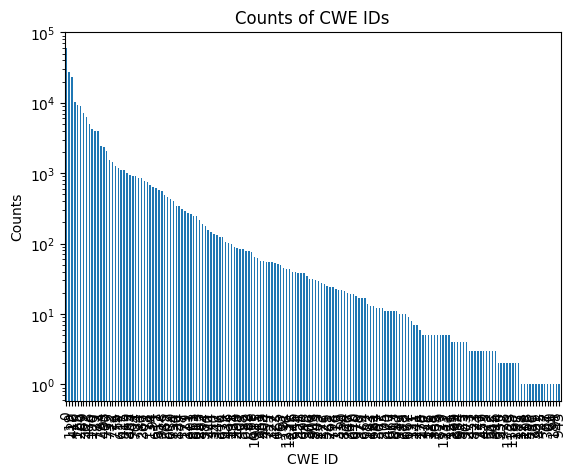

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique values in 'cwe_id' column
cwe_counts = combined_df['cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar', logy=True)
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

In [26]:
# print(cwe_counts.to_string())


In [27]:
# top_cwe_list = cwe_counts.iloc[:21].index.tolist()
# top_cwe_list

In [28]:
cwe_counts = combined_df['cwe_id'].value_counts()
print(cwe_counts.tolist())

[59109, 27331, 23049, 10115, 9351, 9134, 7111, 6322, 4973, 4187, 3977, 3932, 2467, 2349, 2067, 1547, 1440, 1257, 1169, 1115, 1111, 995, 934, 926, 916, 850, 844, 785, 751, 675, 640, 609, 570, 561, 488, 454, 433, 408, 341, 338, 309, 293, 276, 262, 248, 244, 217, 187, 180, 156, 146, 135, 133, 126, 124, 105, 102, 100, 89, 86, 85, 85, 79, 78, 76, 64, 62, 57, 56, 55, 55, 54, 53, 52, 49, 45, 44, 43, 40, 39, 38, 38, 38, 35, 31, 31, 30, 29, 28, 27, 25, 24, 24, 23, 22, 22, 21, 20, 19, 19, 18, 17, 17, 17, 14, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [29]:
cwe_sort = cwe_counts.index.tolist()
# cwe_sort = sorted([int(item) for item in cwe_sort])
print(len(cwe_sort),cwe_sort)

171 [0, 119, 20, 416, 125, 200, 89, 362, 476, 190, 79, 787, 284, 93, 400, 732, 22, 772, 59, 617, 415, 269, 835, 404, 704, 74, 287, 369, 78, 134, 94, 611, 352, 918, 285, 502, 639, 754, 120, 834, 77, 129, 311, 601, 863, 613, 295, 862, 384, 770, 444, 330, 347, 346, 674, 532, 436, 191, 434, 290, 401, 358, 682, 88, 668, 1021, 915, 281, 909, 494, 755, 327, 122, 665, 763, 91, 1236, 1321, 276, 640, 354, 426, 693, 345, 306, 908, 843, 203, 172, 326, 521, 252, 798, 116, 312, 90, 824, 706, 307, 610, 670, 378, 379, 664, 522, 193, 681, 294, 367, 73, 805, 470, 667, 913, 697, 319, 788, 672, 662, 131, 331, 241, 178, 776, 427, 126, 338, 305, 759, 829, 1333, 212, 121, 359, 209, 684, 924, 825, 303, 273, 457, 823, 774, 277, 459, 475, 552, 565, 916, 644, 335, 428, 1336, 23, 1188, 297, 185, 328, 113, 208, 538, 786, 321, 922, 425, 27, 304, 80, 184, 98, 943]


## Reassign minor cwe_ids to level 3

49743


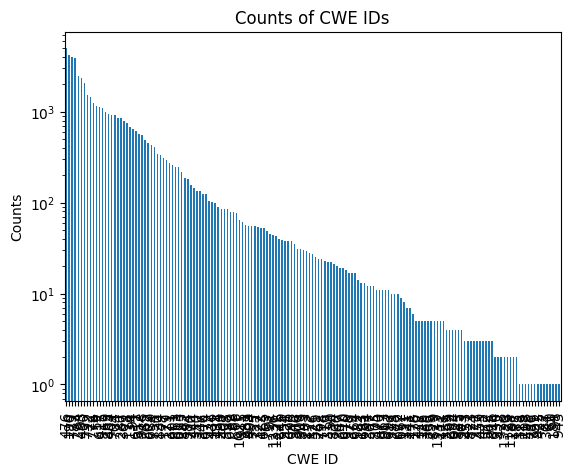

In [30]:
# log plot - y axis log scale --> more understandable

# Filter out 'cwe_id's with count less than 20
filtered_cwes = cwe_counts[cwe_counts < 5000]
print(filtered_cwes.sum())
# Plotting
filtered_cwes.plot(kind='bar', logy=True)
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

18152


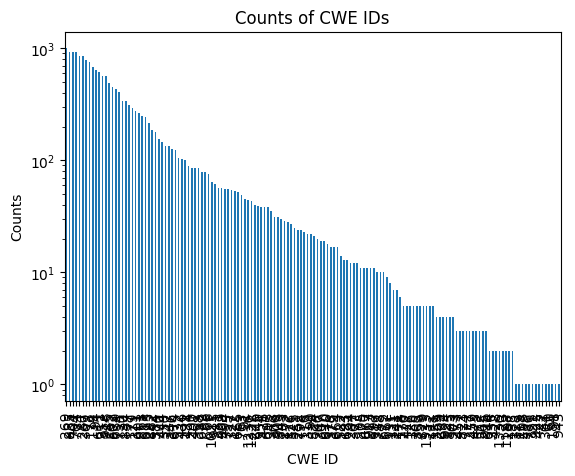

In [31]:
# Filter out 'cwe_id's with count less than minimum_cwe_cnt
minimum_cwe_cnt = 1000
filtered_cwes = cwe_counts[cwe_counts < minimum_cwe_cnt]
print(filtered_cwes.sum())
# Plotting
filtered_cwes.plot(kind='bar', logy=True)
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

In [32]:
filtered_cwes_list = filtered_cwes.index.tolist()
filtered_cwes_list = sorted([int(item) for item in filtered_cwes_list])
print(len(filtered_cwes_list),filtered_cwes_list)

150 [23, 27, 73, 74, 77, 78, 80, 88, 90, 91, 94, 98, 113, 116, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 191, 193, 203, 208, 209, 212, 241, 252, 269, 273, 276, 277, 281, 285, 287, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 352, 354, 358, 359, 367, 369, 378, 379, 384, 401, 404, 425, 426, 427, 428, 434, 436, 444, 457, 459, 470, 475, 494, 502, 521, 522, 532, 538, 552, 565, 601, 610, 611, 613, 639, 640, 644, 662, 664, 665, 667, 668, 670, 672, 674, 681, 682, 684, 693, 697, 704, 706, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 835, 843, 862, 863, 908, 909, 913, 915, 916, 918, 922, 924, 943, 1021, 1188, 1236, 1321, 1333, 1336]


In [33]:
'''
iterative method
1. find the minor cwe_id
2. just one level up
3. see
'''

import json
import pandas as pd

# Load the CWE paths from your JSON (Assuming it's stored in a variable named `cwe_paths_json`)
node_paths_dir = 'data_preprocessing/preprocessed_datasets/debug_datasets'
with open(f'{node_paths_dir}/graph_all_paths.json', 'r') as f:
    cwe_paths = json.load(f)

In [34]:

# Function to reassign CWEs to a higher level in the hierarchy
def reassign_cwe(cwe_id, level=3):
    # Find the path for the given CWE ID
    paths = cwe_paths.get(str(int(cwe_id)), [])
    new_paths = []

    # Reassign to the specified level up in the hierarchy
    for path in paths:
        parts = path.split("-")
        parts = [str(int(part)) for part in parts]
        if len(parts) > level:
            new_path = "-".join(parts[:level+1])
            new_paths.append(new_path)
        else:
            print(f"len(parts) <= level:{path}")
            new_paths.append(path)  # No reassignment if path is too short

    return new_paths

# Reassign the filtered CWEs
reassigned_cwe_paths = {}
for cwe_id in filtered_cwes_list:
    reassigned_cwe_paths[cwe_id] = reassign_cwe(int(cwe_id), level=3)

print("reassigned_cwe_paths",reassigned_cwe_paths)



len(parts) <= level:10000-1000-664
len(parts) <= level:10000-1000-682
len(parts) <= level:10000-1000-693
len(parts) <= level:10000-1000-697
reassigned_cwe_paths {23: ['10000-1000-664-706'], 27: ['10000-1000-664-706'], 73: ['10000-1000-664-669', '10000-1000-664-610'], 74: ['10000-1000-707-74'], 77: ['10000-1000-707-74'], 78: ['10000-1000-707-74'], 80: ['10000-1000-707-74'], 88: ['10000-1000-707-74'], 90: ['10000-1000-707-74'], 91: ['10000-1000-707-74'], 94: ['10000-1000-707-74', '10000-1000-664-913'], 98: ['10000-1000-664-706', '10000-1000-664-669'], 113: ['10000-1000-707-74', '10000-1000-435-436'], 116: ['10000-1000-707-116'], 120: ['10000-1000-664-118'], 121: ['10000-1000-664-118', '10000-1000-664-118'], 122: ['10000-1000-664-118', '10000-1000-664-118'], 126: ['10000-1000-664-118', '10000-1000-664-118'], 129: ['10000-1000-707-20'], 131: ['10000-1000-682-131'], 134: ['10000-1000-664-668'], 172: ['10000-1000-707-172'], 178: ['10000-1000-664-706'], 184: ['10000-1000-693-184', '10000-1000

In [35]:
# Prepare a new mapping dictionary by getting the last element of each path
new_cwe_mapping = {k: v[-1].split('-')[-1] for k, v in reassigned_cwe_paths.items()if v}

# Use the mapping to create a new 're_cwe_id' column
# It maps the cwe_id to the last element in the path if it's in the new_cwe_mapping; otherwise, keeps the original cwe_id
combined_df['re_cwe_id'] = combined_df['cwe_id'].map(new_cwe_mapping).fillna(combined_df['cwe_id'])
combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]
combined_df['re_cwe_id']  = combined_df['re_cwe_id'].astype(int)
combined_df['cwe_id']  = combined_df['cwe_id'].astype(int)

combined_df

,code,cwe_id,cve_id,vul,re_cwe_id
0,expand_dynamic_string_token (struct link_map *...,252,CVE-1999-0199,1,754
1,"_dl_dst_substitute (struct link_map *l, const ...",252,CVE-1999-0199,1,754
2,"_dl_dst_count (const char *name, int is_path)\...",252,CVE-1999-0199,1,754
3,"vsyslog(pri, fmt, ap)\n\tint pri;\n\tregister ...",252,CVE-1999-0199,1,754
4,init_syntax_once ()\n{\n register int c;\n ...,252,CVE-1999-0199,1,754
...,...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1,119
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1,119
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1,200
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1,125


In [36]:
# Select and print rows where 'cwe_id' and 're_cwe_id' are different
different_rows = combined_df[combined_df['cwe_id'] != combined_df['re_cwe_id']]
print(different_rows[['cwe_id','re_cwe_id']])

        cwe_id  re_cwe_id
0          252        754
1          252        754
2          252        754
3          252        754
4          252        754
...        ...        ...
145172     120        118
145220     909        665
145258     770        665
145259     770        665
145267     611        610

[10292 rows x 2 columns]


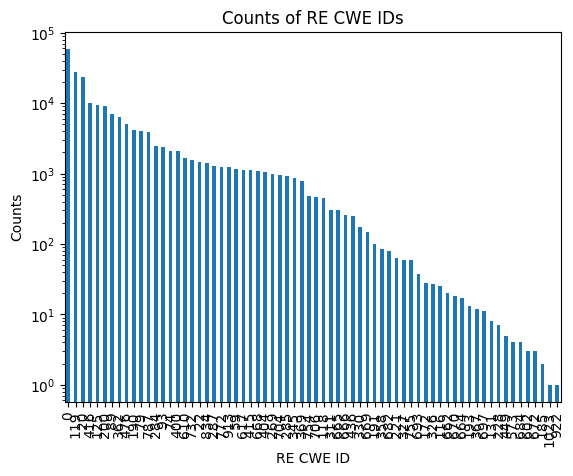

In [37]:
# Count unique values in 'cwe_id' column
cwe_counts = combined_df['re_cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar', logy=True)
plt.xlabel('RE CWE ID')
plt.ylabel('Counts')
plt.title('Counts of RE CWE IDs')
plt.show()

In [38]:
filtered_cwe_counts = combined_df['re_cwe_id'].value_counts()
filtered_cwe_counts

0       59109
119     27331
20      23342
416     10115
125      9351
        ...  
602         3
672         3
185         2
1023        1
922         1
Name: re_cwe_id, Length: 68, dtype: int64

In [39]:
ff = combined_df[combined_df['re_cwe_id']==20]
print(ff.shape)
ff = ff[ff['re_cwe_id'] != ff['cwe_id']]
ff

(23342, 5)


,code,cwe_id,cve_id,vul,re_cwe_id
617,"nfsd4_layout_verify(struct svc_export *exp, un...",129,CVE-2017-8797,1,20
618,nfsd4_encode_layoutget(struct nfsd4_compoundre...,129,CVE-2017-8797,1,20
619,nfsd4_encode_getdeviceinfo(struct nfsd4_compou...,129,CVE-2017-8797,1,20
1688,static int cbs_av1_read_uvlc(CodedBitstreamCon...,129,CVE-2019-1000016,1,20
1696,"static int dwa_uncompress(EXRContext *s, const...",129,CVE-2021-33815,1,20
...,...,...,...,...,...
72839,"nfsd4_encode_fattr(struct xdr_stream *xdr, str...",129,CVE-2017-8797,0,20
141159,int sanity_check_ckpt(struct f2fs_sb_info *sbi...,129,CVE-2017-10663,1,20
142147,"static int handle_eac3(MOVMuxContext *mov, AVP...",129,CVE-2018-13302,1,20
142661,"int snmp_helper(void *context, size_t hdrlen, ...",129,CVE-2019-9162,1,20


269     995
704     959
285     924
345     868
369     785
754     473
706     462
118     450
311     308
665     300
666     258
436     249
330     174
669     150
191     100
358      85
682      79
221      64
327      60
755      59
693      38
172      28
326      27
116      25
662      20
670      18
664      17
193      13
367      12
697      11
131       8
228       7
449       5
573       4
684       4
602       3
672       3
185       2
1023      1
922       1
Name: re_cwe_id, dtype: int64


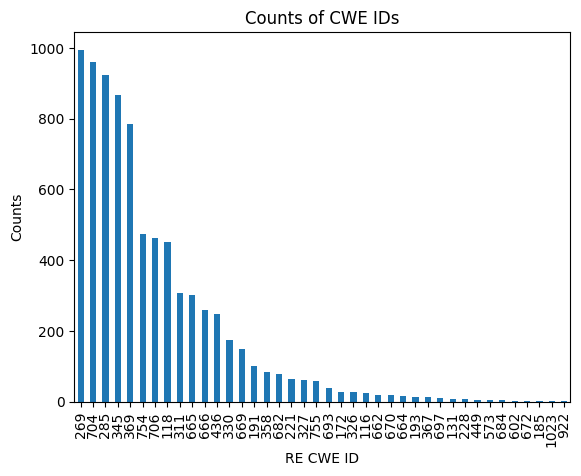

In [40]:
# Filter out 'cwe_id's with count less than minimum_cwe_cnt
filtered_cwes = filtered_cwe_counts[filtered_cwe_counts < minimum_cwe_cnt]
print(filtered_cwes)
# Plotting
filtered_cwes.plot(kind='bar')
plt.xlabel('RE CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

In [41]:
final_filtered_cwes_list = filtered_cwes.index.tolist()

In [42]:
final_filtered_cwes_list = sorted([int(item) for item in final_filtered_cwes_list])
print(final_filtered_cwes_list)

[116, 118, 131, 172, 185, 191, 193, 221, 228, 269, 285, 311, 326, 327, 330, 345, 358, 367, 369, 436, 449, 573, 602, 662, 664, 665, 666, 669, 670, 672, 682, 684, 693, 697, 704, 706, 754, 755, 922, 1023]


In [43]:
print(filtered_cwes_list)

[23, 27, 73, 74, 77, 78, 80, 88, 90, 91, 94, 98, 113, 116, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 191, 193, 203, 208, 209, 212, 241, 252, 269, 273, 276, 277, 281, 285, 287, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 352, 354, 358, 359, 367, 369, 378, 379, 384, 401, 404, 425, 426, 427, 428, 434, 436, 444, 457, 459, 470, 475, 494, 502, 521, 522, 532, 538, 552, 565, 601, 610, 611, 613, 639, 640, 644, 662, 664, 665, 667, 668, 670, 672, 674, 681, 682, 684, 693, 697, 704, 706, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 835, 843, 862, 863, 908, 909, 913, 915, 916, 918, 922, 924, 943, 1021, 1188, 1236, 1321, 1333, 1336]


In [44]:
total_filtered_cwes_list = sorted(list(set(final_filtered_cwes_list+filtered_cwes_list)))
print(len(total_filtered_cwes_list),total_filtered_cwes_list)

159 [23, 27, 73, 74, 77, 78, 80, 88, 90, 91, 94, 98, 113, 116, 118, 120, 121, 122, 126, 129, 131, 134, 172, 178, 184, 185, 191, 193, 203, 208, 209, 212, 221, 228, 241, 252, 269, 273, 276, 277, 281, 285, 287, 290, 294, 295, 297, 303, 304, 305, 306, 307, 311, 312, 319, 321, 326, 327, 328, 330, 331, 335, 338, 345, 346, 347, 352, 354, 358, 359, 367, 369, 378, 379, 384, 401, 404, 425, 426, 427, 428, 434, 436, 444, 449, 457, 459, 470, 475, 494, 502, 521, 522, 532, 538, 552, 565, 573, 601, 602, 610, 611, 613, 639, 640, 644, 662, 664, 665, 666, 667, 668, 669, 670, 672, 674, 681, 682, 684, 693, 697, 704, 706, 754, 755, 759, 763, 770, 774, 776, 786, 788, 798, 805, 823, 824, 825, 829, 834, 835, 843, 862, 863, 908, 909, 913, 915, 916, 918, 922, 924, 943, 1021, 1023, 1188, 1236, 1321, 1333, 1336]


### Save final dataset

In [45]:
# total_filtered_cwes_list is the list of CWE IDs to filter out
final_df = combined_df[~combined_df['cwe_id'].isin(total_filtered_cwes_list)]
final_df.to_csv(f'{data_path}/MSR_CVEfixes_level3.csv', index=False)
final_df

,code,cwe_id,cve_id,vul,re_cwe_id
6,"process_chpw_request(krb5_context context, voi...",20,CVE-2002-2443,1,20
7,"init_ctx_reselect(OM_uint32 *minor_status, spn...",415,CVE-2014-4343,1,415
8,"acc_ctx_cont(OM_uint32 *minstat,\n\t gss_b...",476,CVE-2014-4344,1,476
9,krb5_ldap_get_password_policy_from_dn(krb5_con...,476,CVE-2014-5353,1,476
10,check_rpcsec_auth(struct svc_req *rqstp)\n{\n ...,284,CVE-2014-9422,1,284
...,...,...,...,...,...
145738,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,119,CVE-2016-0835,1,119
145739,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,119,CVE-2016-0835,1,119
145740,int equalizer_get_parameter(effect_context_t *...,200,CVE-2017-0402,1,200
145741,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...",125,CVE-2018-9503,1,125


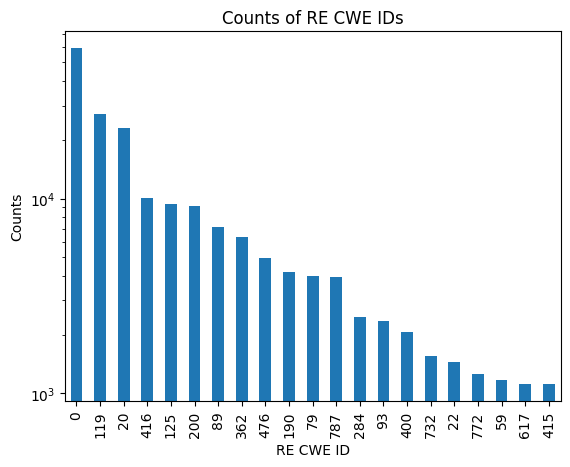

In [46]:
# Count unique values in 'cwe_id' column
cwe_counts = final_df['re_cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar', logy=True)
plt.xlabel('RE CWE ID')
plt.ylabel('Counts')
plt.title('Counts of RE CWE IDs')
plt.show()

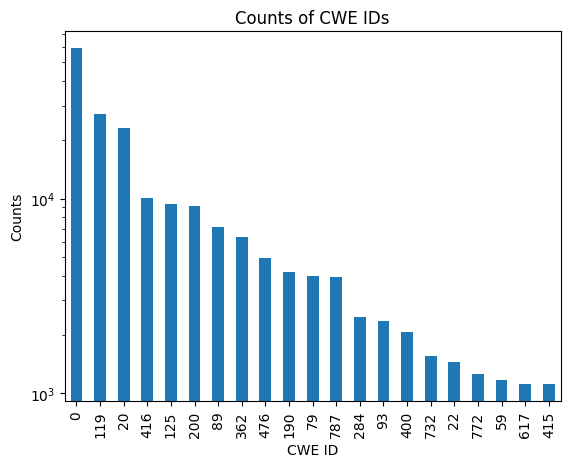

In [47]:
# Count unique values in 'cwe_id' column
cwe_counts = final_df['cwe_id'].value_counts()
# Plotting
cwe_counts.plot(kind='bar', logy=True)
plt.xlabel('CWE ID')
plt.ylabel('Counts')
plt.title('Counts of CWE IDs')
plt.show()

### save filtered-out cwe node paths 

In [48]:
# Filter the dictionary
final_cwe_paths = {int(k): v for k, v in cwe_paths.items() if int(k) not in total_filtered_cwes_list}
# filtered_cwe_paths[0] = ['10000-0']

# Save the filtered dictionary back to the JSON file
with open(f'{node_paths_dir}/graph_final_cwe_paths2.json', 'w') as file:
    json.dump(final_cwe_paths, file)

In [49]:
len(final_cwe_paths)

21

## Stratified split dataset to train/val/test set by CVE id group

Notes:

* This approach attempts to balance the cwe_id distribution while respecting cve_id group integrity, but perfect stratification might still be challenging, depending on your data's characteristics.
* This method could be computationally intensive, especially for large datasets.
* The final datasets might still not have a perfect balance of cwe_id due to the constraint of keeping cve_id groups together and the original distribution of the data.
* Depending on your specific needs and the size of your dataset, you might need to tailor this approach or consider alternative methods, such as custom algorithms for more controlled stratification.



In [50]:
# df = final_df

In [51]:
# # shuffle and split 
# from sklearn.model_selection import GroupShuffleSplit
# import pandas as pd

# # Assuming df is your DataFrame
# # Set the split parameters
# test_size = 0.1
# validation_size = 0.05
# random_state = 42

# # First, split into training + (validation + test)
# gss = GroupShuffleSplit(n_splits=1, test_size=test_size + validation_size, random_state=random_state)
# train_idx, test_validation_idx = next(gss.split(df, groups=df['cve_id']))

# train = df.iloc[train_idx]
# test_validation = df.iloc[test_validation_idx]

# # Now, split the (validation + test) into validation and test
# # Adjust the test_size for this split
# adjusted_test_size = test_size / (test_size + validation_size)
# gss = GroupShuffleSplit(n_splits=1, test_size=adjusted_test_size, random_state=random_state)
# validation_idx, test_idx = next(gss.split(test_validation, groups=test_validation['cve_id']))

# validation = test_validation.iloc[validation_idx]
# test = test_validation.iloc[test_idx]

# # Saving datasets to CSV
# train.to_csv(f'{data_path}/train_dataset.csv', index=False)
# validation.to_csv(f'{data_path}/validation_dataset.csv', index=False)
# test.to_csv(f'{data_path}/test_dataset.csv', index=False)


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution
def plot_distribution(dataset, title):
    plt.figure(figsize=(12, 6))
    cwe_counts = dataset['cwe_id'].value_counts()
    sns.barplot(x=cwe_counts.index, y=cwe_counts.values)
    plt.title(title)
    plt.ylabel('Number of Occurrences')
    plt.xlabel('CWE ID')
    plt.xticks(rotation=90)  # Rotates the x-axis labels to be more readable
    plt.show()


In [53]:
# # Plotting for each dataset
# plot_distribution(train, 'Training Set CWE ID Distribution')
# plot_distribution(validation, 'Validation Set CWE ID Distribution')
# plot_distribution(test, 'Test Set CWE ID Distribution')


Notes:

* This approach attempts to balance the cwe_id distribution while respecting cve_id group integrity, but perfect stratification might still be challenging, depending on your data's characteristics.
* This method could be computationally intensive, especially for large datasets.
* The final datasets might still not have a perfect balance of cwe_id due to the constraint of keeping cve_id groups together and the original distribution of the data.
* Depending on your specific needs and the size of your dataset, you might need to tailor this approach or consider alternative methods, such as custom algorithms for more controlled stratification.

In [54]:
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution
def plot_distribution(dataset, title, col_name='cwe_id'):
    plt.figure(figsize=(12, 6))
    col_counts = dataset[col_name].value_counts()
    sns.barplot(x=col_counts.index, y=col_counts.values)
    plt.title(title)
    plt.ylabel('Number of Occurrences')
    plt.xlabel(col_name)
    plt.xticks(rotation=90)  # Rotates the x-axis labels to be more readable
    plt.show()

def stratify_dataset(df, col_name='cwe_id'):
    initial_allocation = defaultdict(lambda: {"train": 0, "validation": 0, "test": 0})

    # Initialize datasets
    train, validation, test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    random_state = 42


    for cwe_id, group in df.groupby(col_name):
    #     print("cwe_id, group",cwe_id, group)
        # For each cwe_id, allocate the first few cve_id groups to different datasets
        for i, (cve_id, cve_group) in enumerate(group.groupby('cve_id')):
            if i % 10 > 2:
                train = pd.concat([train, cve_group])
                initial_allocation[cwe_id]["train"] += len(cve_group)
            elif i % 10 == 2:
                validation = pd.concat([validation, cve_group])
                initial_allocation[cwe_id]["validation"] += len(cve_group)
            else:
                test = pd.concat([test, cve_group])
                initial_allocation[cwe_id]["test"] += len(cve_group)
    remaining_df = df[~df['cve_id'].isin(pd.concat([train, validation, test])['cve_id'])]
    print(remaining_df.shape)
    # if not remaining_df.empty:
    #     remaining_train, remaining_validation, remaining_test = split_group(remaining_df, len(remaining_df))
    #     train = pd.concat([train, remaining_train])
    #     validation = pd.concat([validation, remaining_validation])
    #     test = pd.concat([test, remaining_test])

    
    train = train.sample(frac=1, random_state=random_state).reset_index(drop=True)
    validation = validation.sample(frac=1, random_state=random_state).reset_index(drop=True)
    test = test.sample(frac=1, random_state=random_state).reset_index(drop=True)
    print(train.shape[0], validation.shape[0], test.shape[0])
    return train, validation, test




(0, 5)
123214 19303 40596


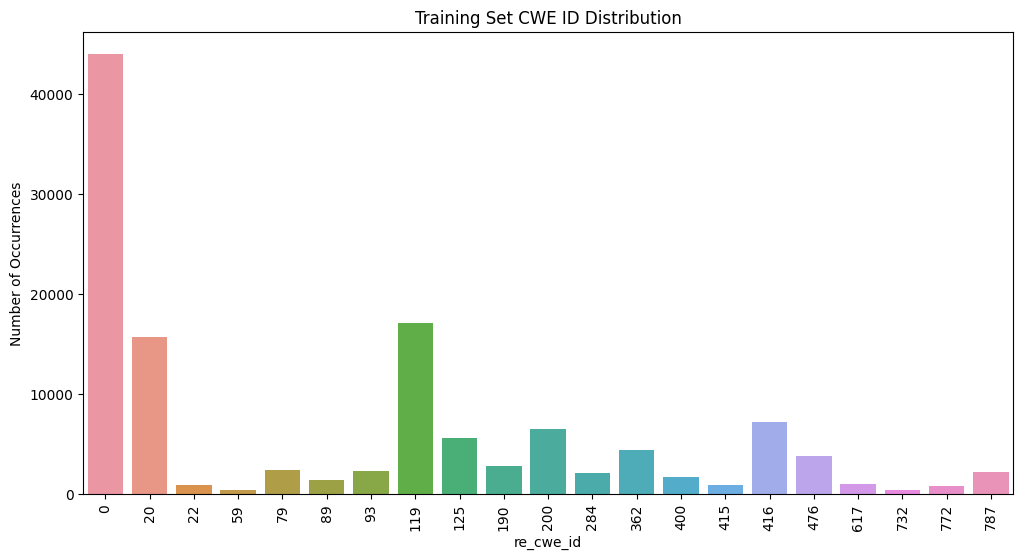

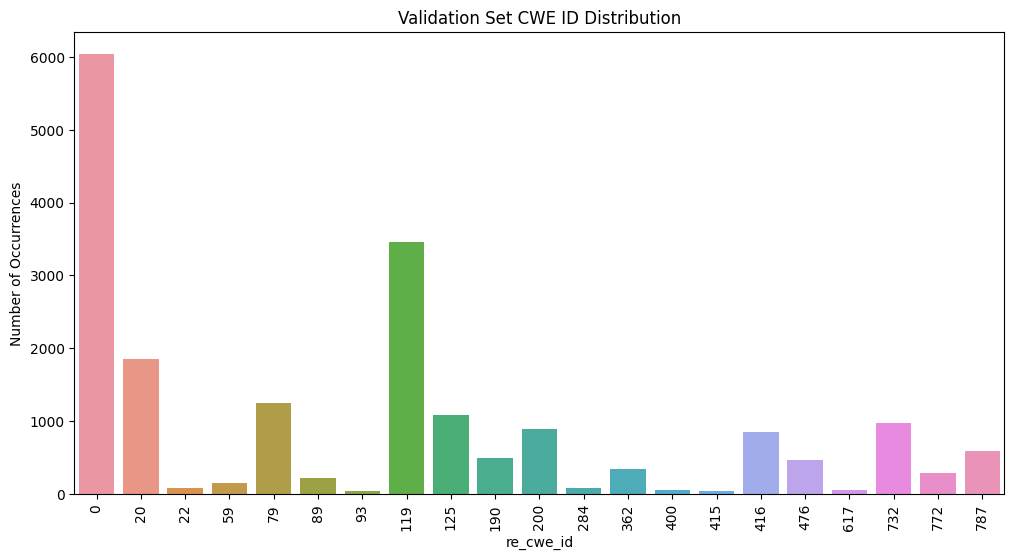

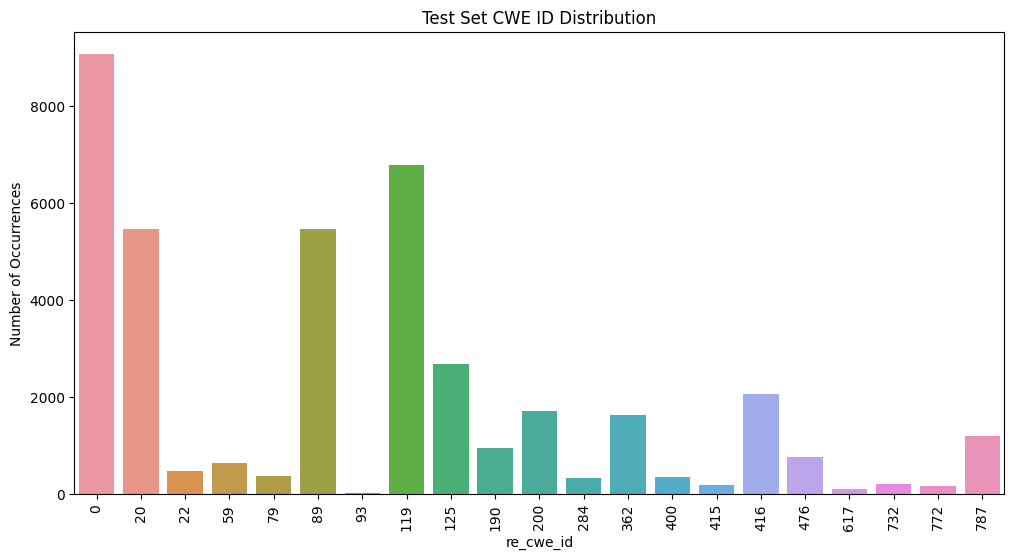

In [55]:
# Split Reassigned Dataset
train, validation, test = stratify_dataset(final_df, col_name='re_cwe_id')

train.to_csv(f'{data_path}/train_dataset.csv', index=False)
validation.to_csv(f'{data_path}/validation_dataset.csv', index=False)
test.to_csv(f'{data_path}/test_dataset.csv', index=False)

# Plotting for each dataset
plot_distribution(train, 'Training Set CWE ID Distribution', 're_cwe_id')
plot_distribution(validation, 'Validation Set CWE ID Distribution','re_cwe_id')
plot_distribution(test, 'Test Set CWE ID Distribution','re_cwe_id')


(0, 5)
133567 21008 46690


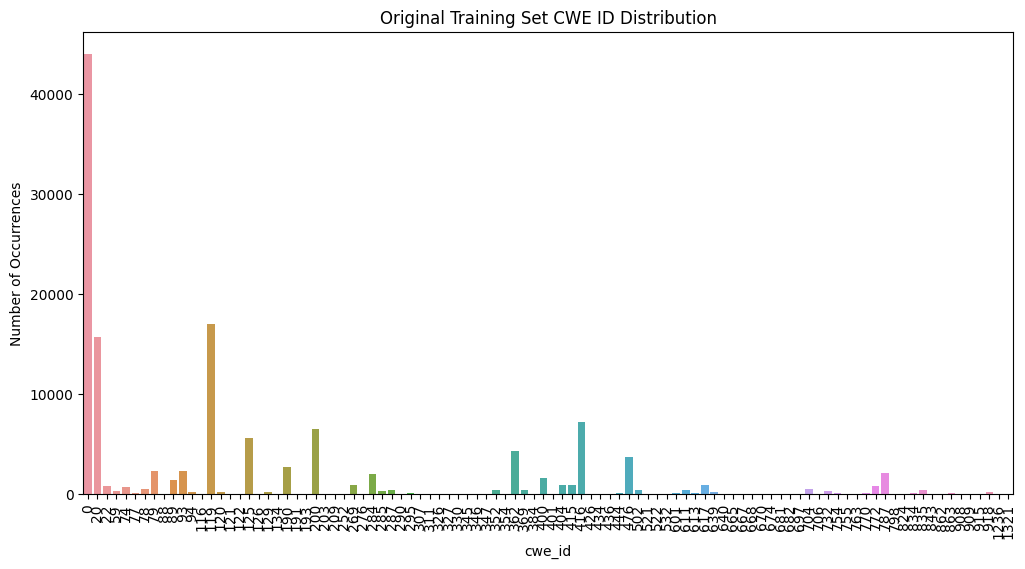

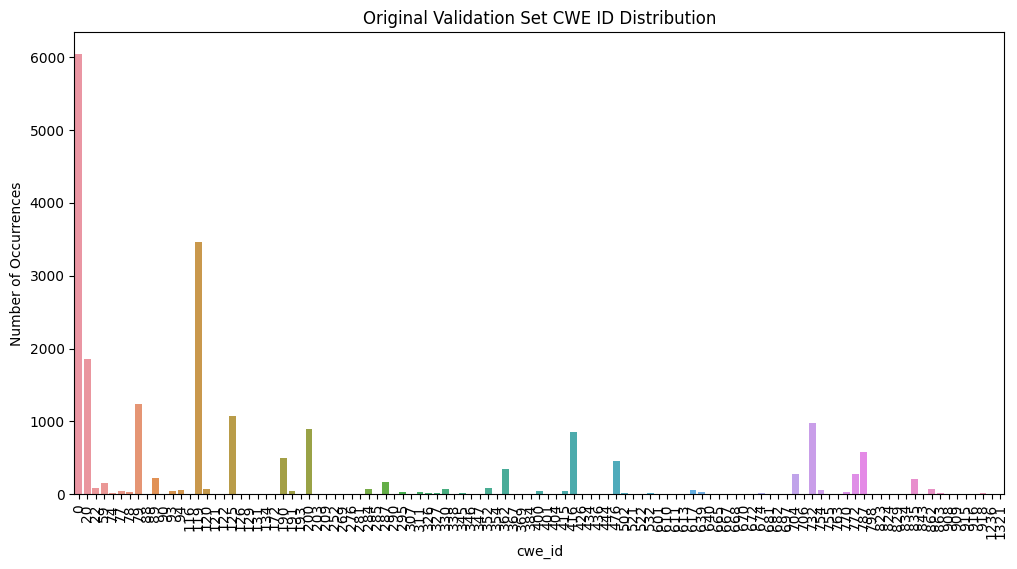

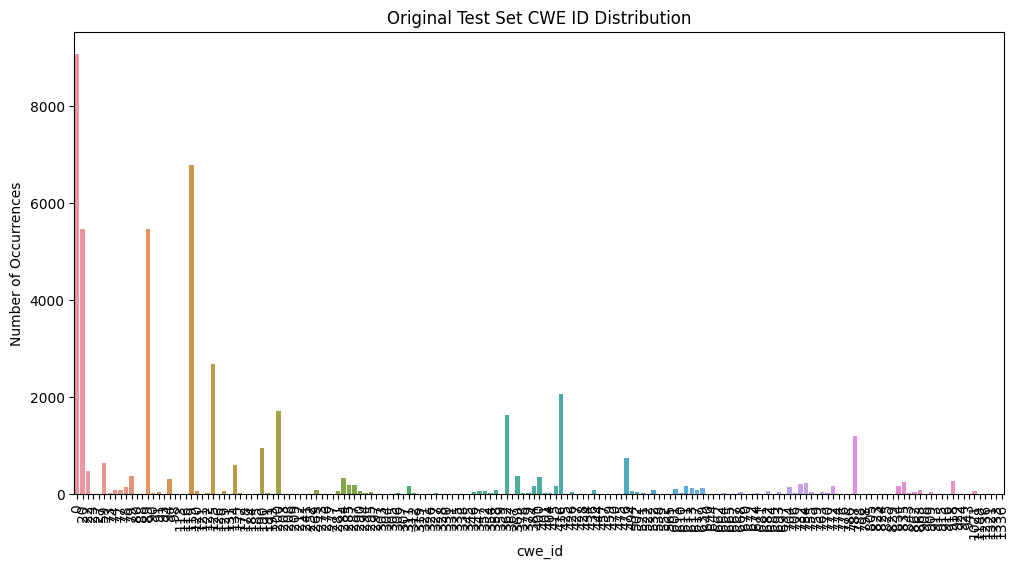

In [56]:
# Split Original Combined Dataset
ori_train, ori_validation, ori_test = stratify_dataset(combined_df, col_name='cwe_id')

ori_train.to_csv(f'{data_path}/ori_train_dataset.csv', index=False)
ori_validation.to_csv(f'{data_path}/ori_validation_dataset.csv', index=False)
ori_test.to_csv(f'{data_path}/ori_test_dataset.csv', index=False)

# Plotting for each dataset
plot_distribution(ori_train, 'Original Training Set CWE ID Distribution')
plot_distribution(ori_validation, 'Original Validation Set CWE ID Distribution')
plot_distribution(ori_test, 'Original Test Set CWE ID Distribution')


(5005, 5)


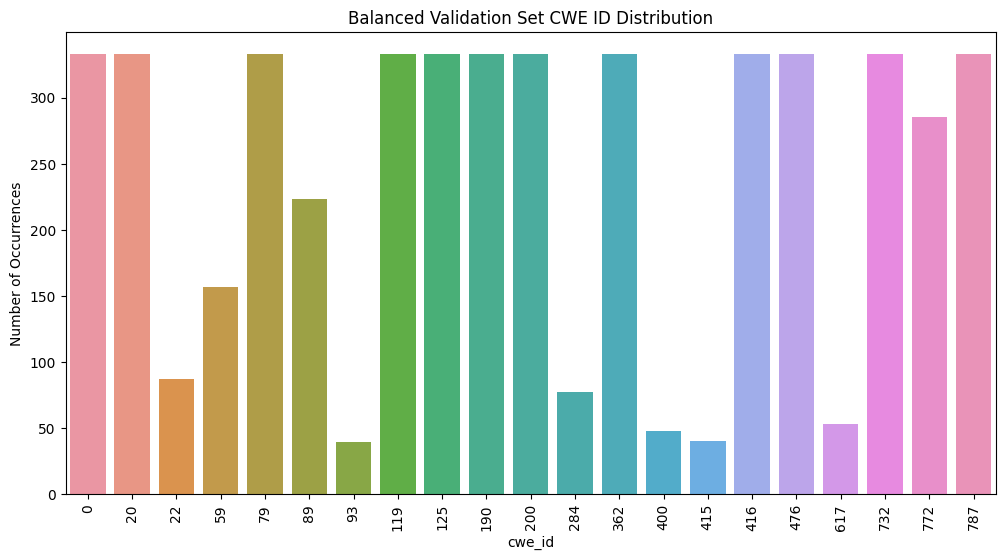

In [57]:
def guess_samples_per_cwe_id(validation, target_sample_size, col_name = 're_cwe_id'):
    num_unique_cwe_ids = validation[col_name].nunique()

    samples_per_cwe_id = target_sample_size // num_unique_cwe_ids
    while samples_per_cwe_id < len(validation):
        total_samples = 0
        for cwe_id in validation[col_name].unique():
            samples_to_take = min(samples_per_cwe_id, len(validation[validation[col_name] == cwe_id]))
            total_samples += samples_to_take

        if total_samples >= target_sample_size:
            break
        samples_per_cwe_id += 1
    return samples_per_cwe_id

def create_balanced_validation_dataset(validation, target_sample_size, col_name='re_cwe_id',random_state=42):

    # Calculate how many samples to take per CWE ID
    samples_per_cwe_id = guess_samples_per_cwe_id(validation, target_sample_size, col_name = 're_cwe_id')
    
    # Sample the rows
    balanced_validation = pd.DataFrame()

    for cwe_id in validation[col_name].unique():
        # If there are not enough samples for a particular cwe_id, take all available
        samples_to_take = min(samples_per_cwe_id, len(validation[validation[col_name] == cwe_id]))
        sampled_group = validation[validation[col_name] == cwe_id].sample(n=samples_to_take, random_state=random_state)
        balanced_validation = pd.concat([balanced_validation, sampled_group])

    # Check if we have reached the target sample size
    current_sample_size = len(balanced_validation)

    # If the current sample size is less than the target, fill in the remaining with random samples from the validation set
    # IF it happens it would be a problem.
    if current_sample_size < target_sample_size:
        additional_samples = validation.sample(n=target_sample_size - current_sample_size, random_state=random_state)
        balanced_validation = pd.concat([balanced_validation, additional_samples])

    # Shuffle the balanced validation set
    balanced_validation = balanced_validation.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Update the validation DataFrame
    validation = balanced_validation
    print(validation.shape)
    return validation

# Desired total sample size
target_sample_size = 5000
balanced_validation = create_balanced_validation_dataset(validation, target_sample_size, col_name='re_cwe_id')
# Output the sampled DataFrame
validation.to_csv(f'{data_path}/balanced_validation_dataset.csv', index=False)
plot_distribution(balanced_validation, 'Balanced Validation Set CWE ID Distribution')

(5013, 5)


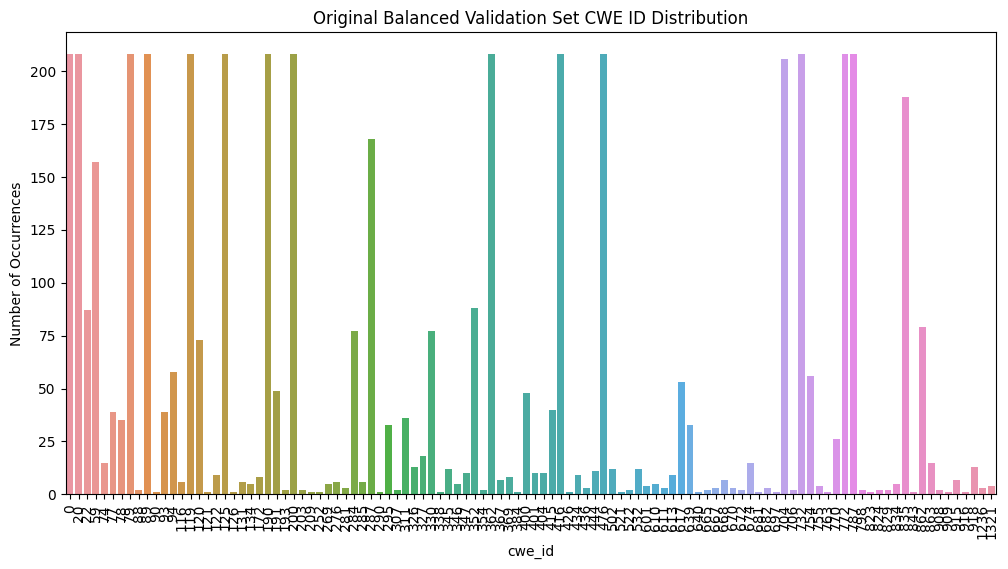

In [58]:
# Desired total sample size
target_sample_size = 5000
ori_balanced_validation = create_balanced_validation_dataset(ori_validation,target_sample_size, col_name='re_cwe_id')
# Output the sampled DataFrame
ori_balanced_validation.to_csv(f'{data_path}/ori_balanced_validation_dataset.csv', index=False)
plot_distribution(ori_balanced_validation, 'Original Balanced Validation Set CWE ID Distribution')

In [59]:
train.shape[0], validation.shape[0], test.shape[0]

(123214, 19303, 40596)